# Check Wine Quality

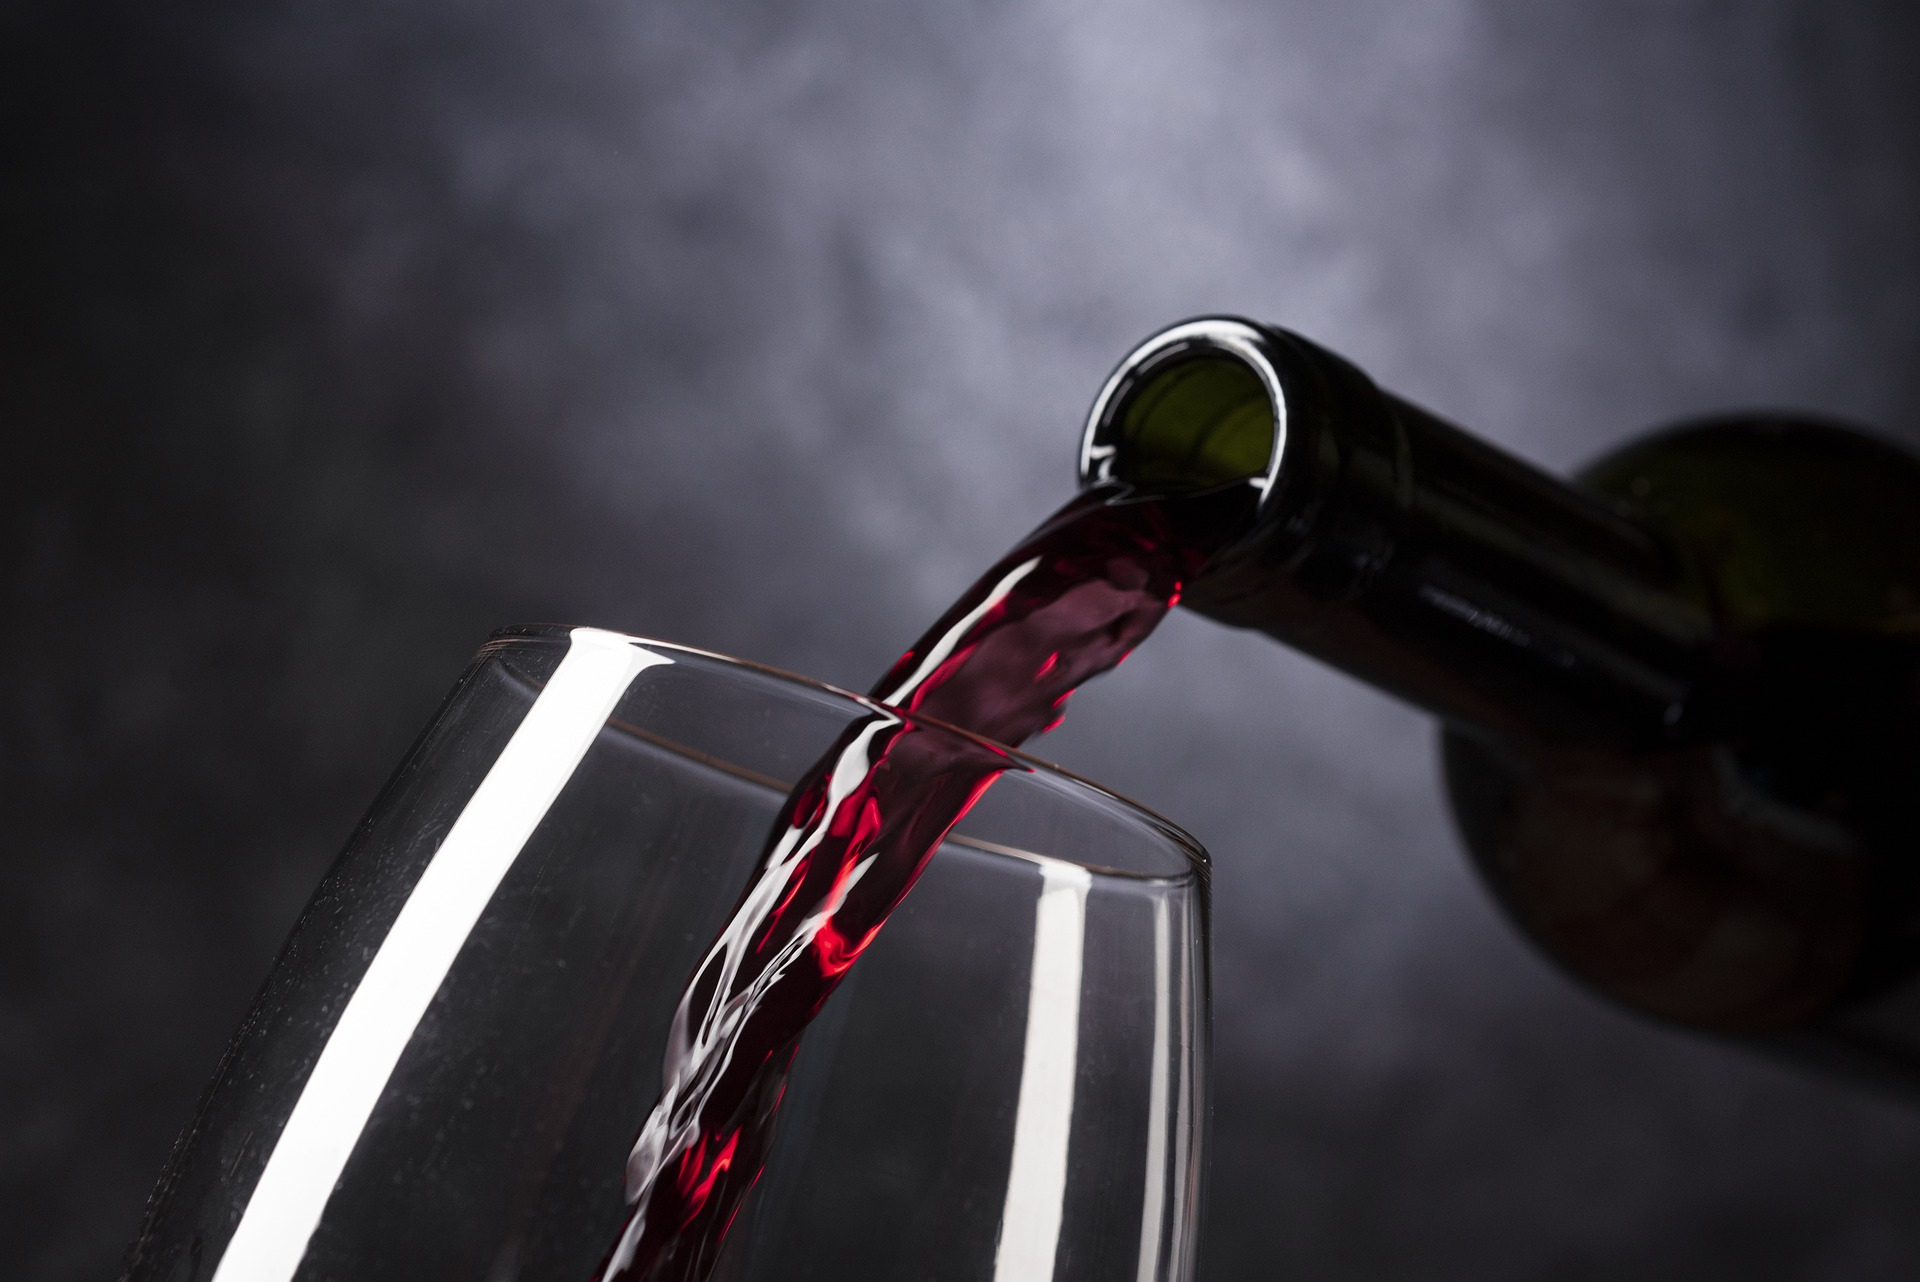

In [43]:
from PIL import Image
Image.open("wine.png")

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [45]:
wine_df=pd.read_csv("winequalityN.csv")
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [46]:
df=wine_df.copy()

In [47]:
df.shape

(6497, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [49]:
df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [50]:
df[df.quality==9]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [51]:
df[df.quality==3]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
251,white,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.80,3
253,white,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.70,3
294,white,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.50,3
445,white,7.1,0.320,0.32,11.00,0.038,16.0,66.0,0.99370,3.24,0.40,11.50,3
740,white,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.60,3
873,white,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.60,3
1034,white,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.10,3
1229,white,8.3,0.330,0.42,1.15,0.033,18.0,96.0,0.99110,3.20,0.32,12.40,3
1417,white,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.00,3
1484,white,7.5,0.320,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.10,3


<Axes: >

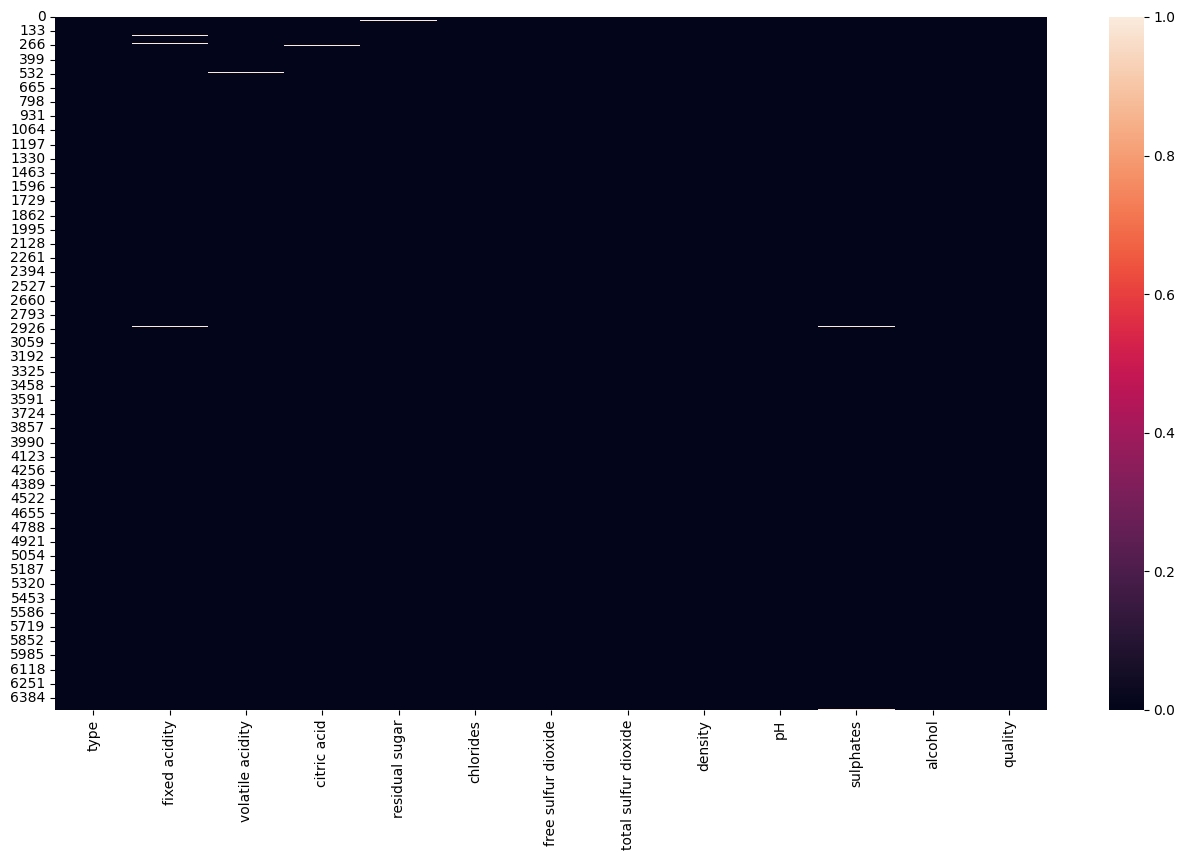

In [52]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [53]:
null_per=round(df.isnull().sum()/df.shape[0]*100,2)
null_per

type                    0.00
fixed acidity           0.15
volatile acidity        0.12
citric acid             0.05
residual sugar          0.03
chlorides               0.03
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
pH                      0.14
sulphates               0.06
alcohol                 0.00
quality                 0.00
dtype: float64

In [54]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [55]:
null_columns=null_per[null_per>0].keys()
null_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'pH', 'sulphates'],
      dtype='object')

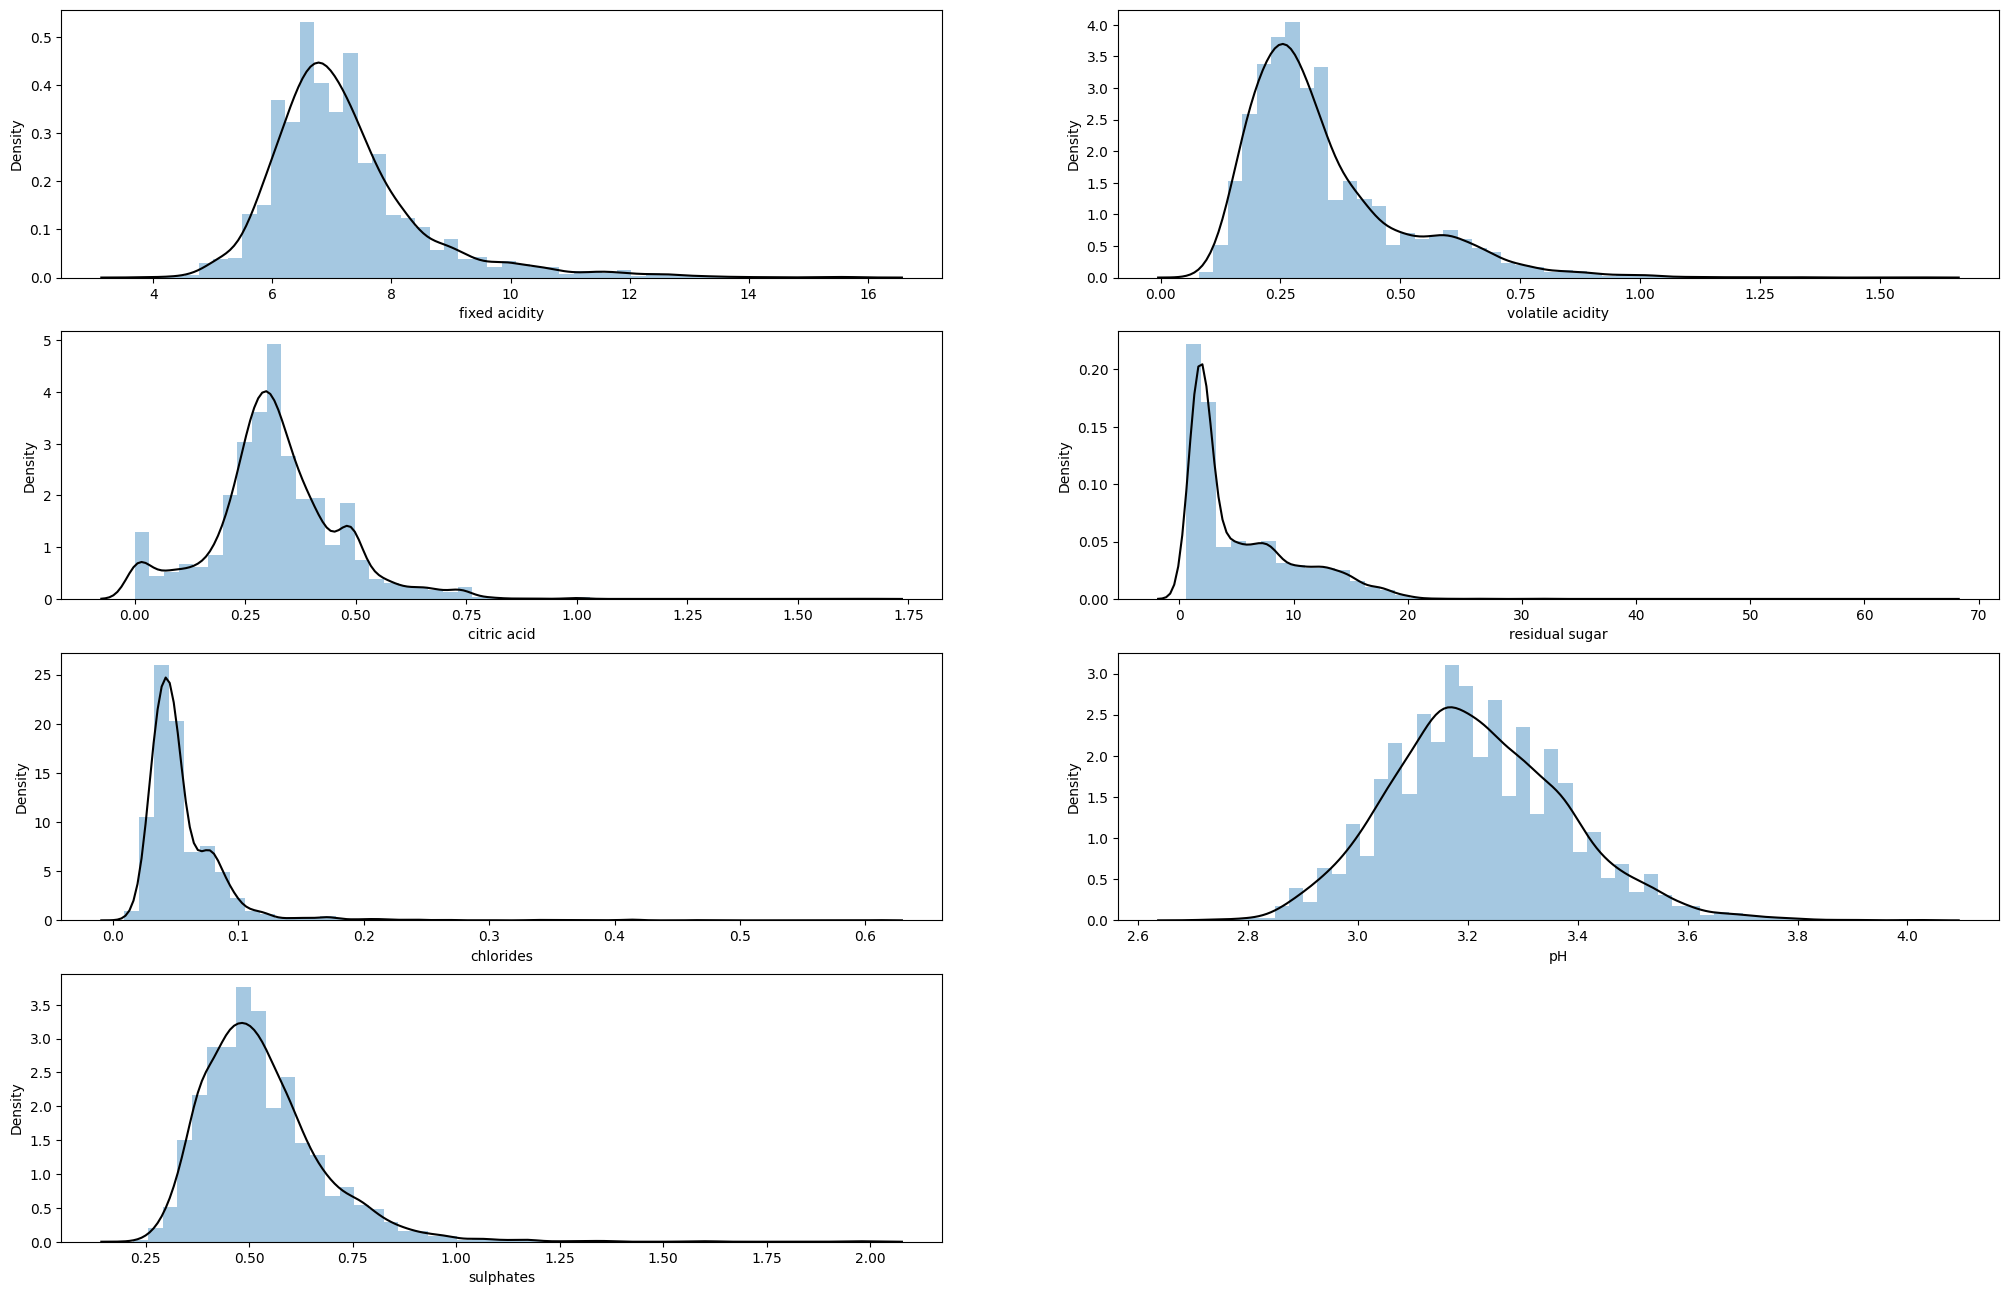

In [56]:
plt.figure(figsize=(25,16))
for i,col in enumerate(null_columns):
    plt.subplot(4,2,i+1)
    sns.distplot(df[col],kde_kws={'color':'k'})


In [57]:
mean_col=["fixed acidity","pH"]
median_col=[col for col in null_columns if col not in mean_col]


In [58]:
print("Fill null with mean:-")
print(mean_col)
print()
print("Fill null with median:-")
print(median_col)

Fill null with mean:-
['fixed acidity', 'pH']

Fill null with median:-
['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'sulphates']


In [59]:
type_=df["type"].unique()
type_

array(['white', 'red'], dtype=object)

In [60]:
df[df["type"]==type_[0]]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [73]:
df[df["type"]=="white"][mean_col]

,fixed acidity,pH
0,7.0,3.00
1,6.3,3.30
2,8.1,3.26
3,7.2,3.19
4,7.2,3.19
...,...,...
4893,6.2,3.27
4894,6.6,3.15
4895,6.5,2.99
4896,5.5,3.34


In [74]:
df.loc[df['type'] == 'white', mean_col] = df.loc[df['type'] == 'white', mean_col].fillna(df[df['type'] == 'white'][mean_col].mean())
df.loc[df['type'] == 'red', mean_col] = df.loc[df['type'] == 'red', mean_col].fillna(df[df['type'] == 'red'][mean_col].mean())
df[mean_col].isnull().sum()

fixed acidity    0
pH               0
dtype: int64

In [75]:
df.loc[df['type'] == 'white', median_col] = df.loc[df['type'] == 'white', median_col].fillna(df[df['type'] == 'white'][median_col].mean())
df.loc[df['type'] == 'red', median_col] = df.loc[df['type'] == 'red', median_col].fillna(df[df['type'] == 'red'][median_col].mean())
df[median_col].isnull().sum()

volatile acidity    0
citric acid         0
residual sugar      0
chlorides           0
sulphates           0
dtype: int64

In [76]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


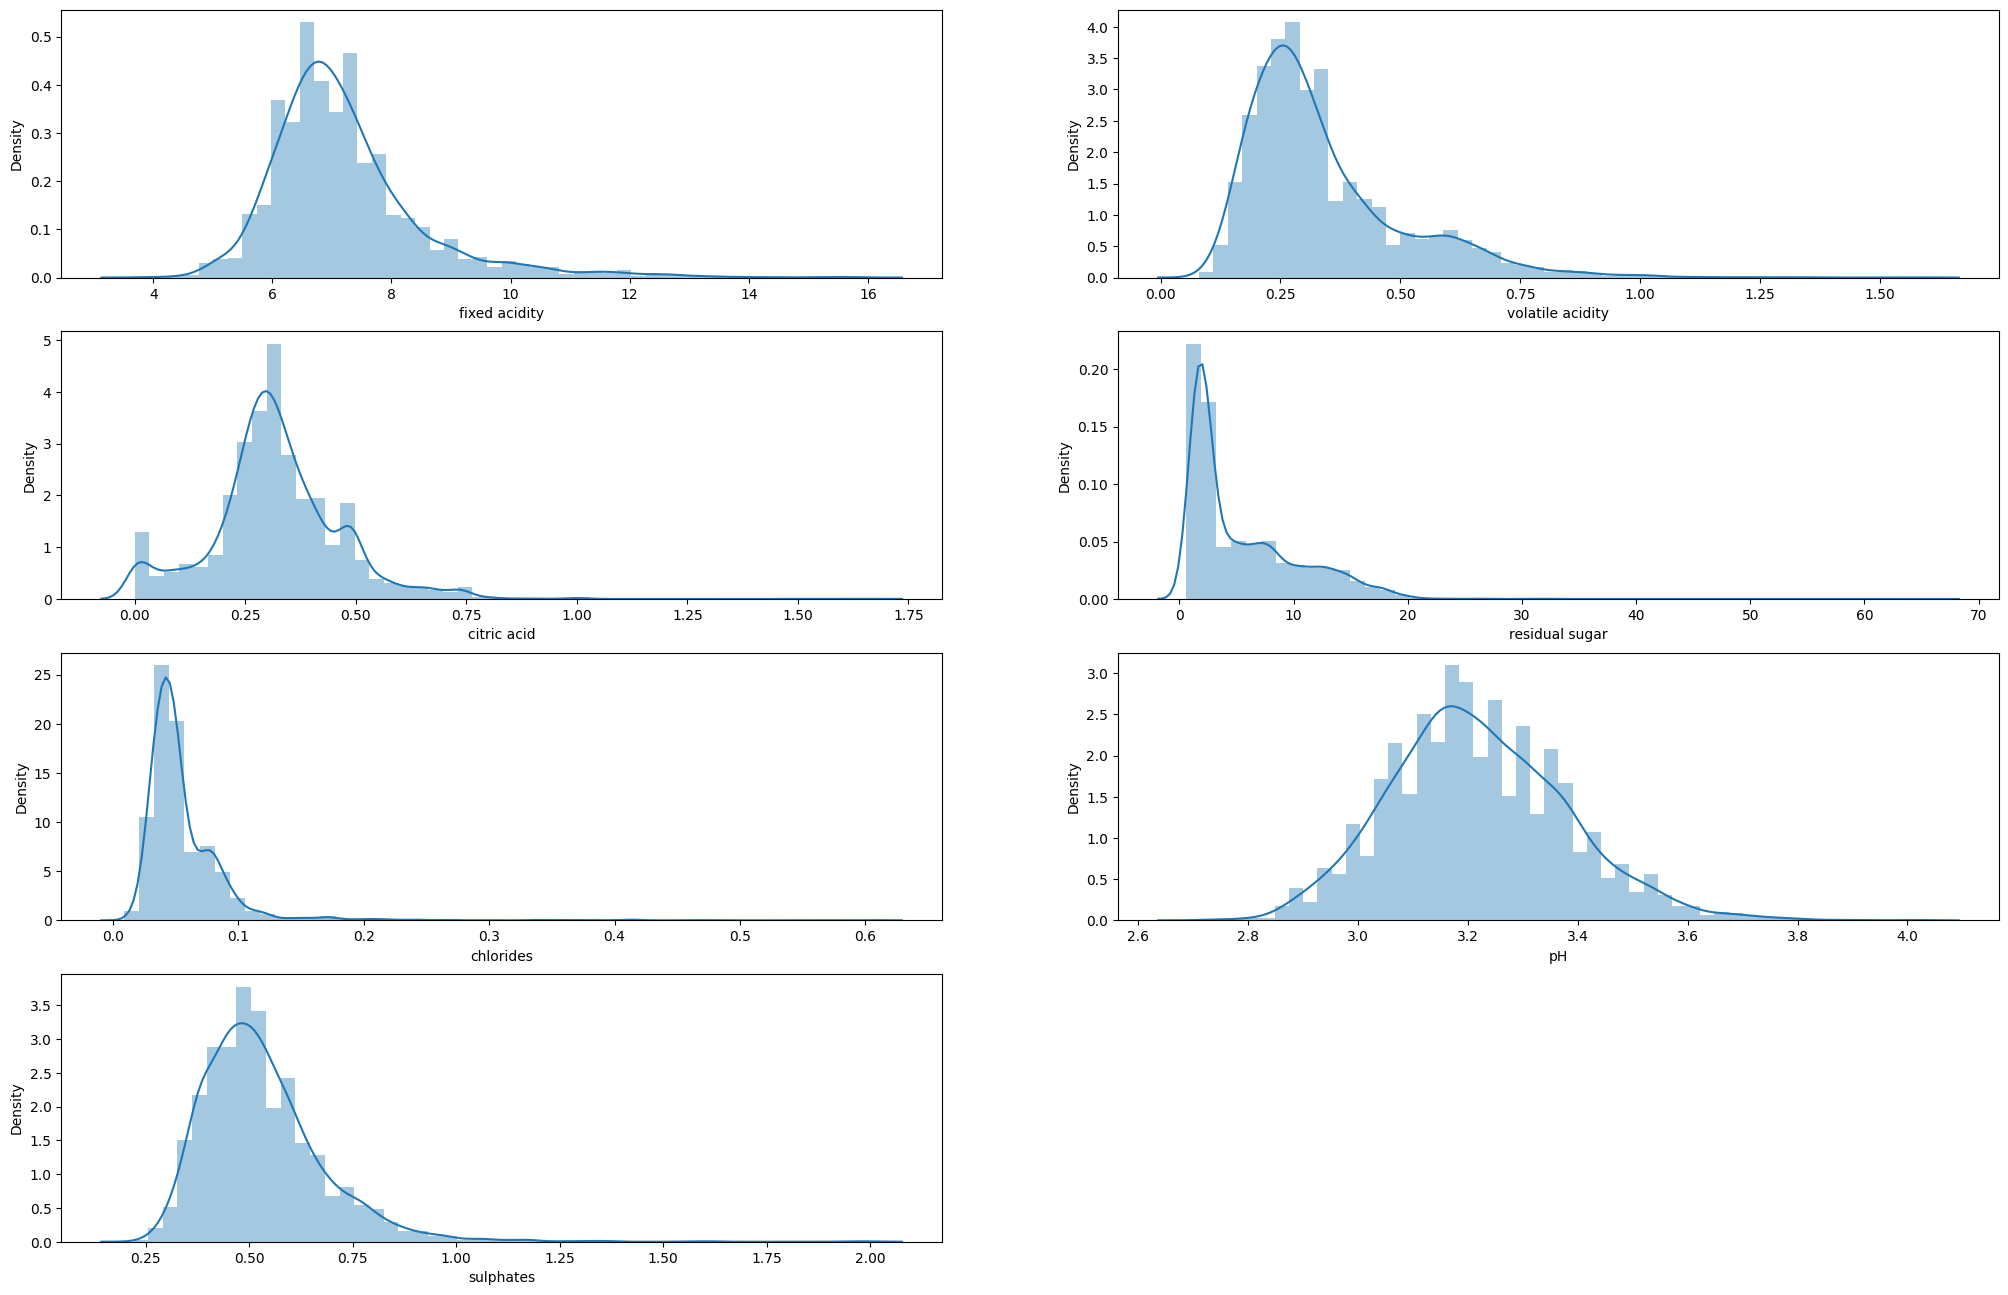

In [78]:
plt.figure(figsize=(25,16))
for i,col in enumerate(null_columns):
    plt.subplot(4,2,i+1)
    sns.distplot(df[col])

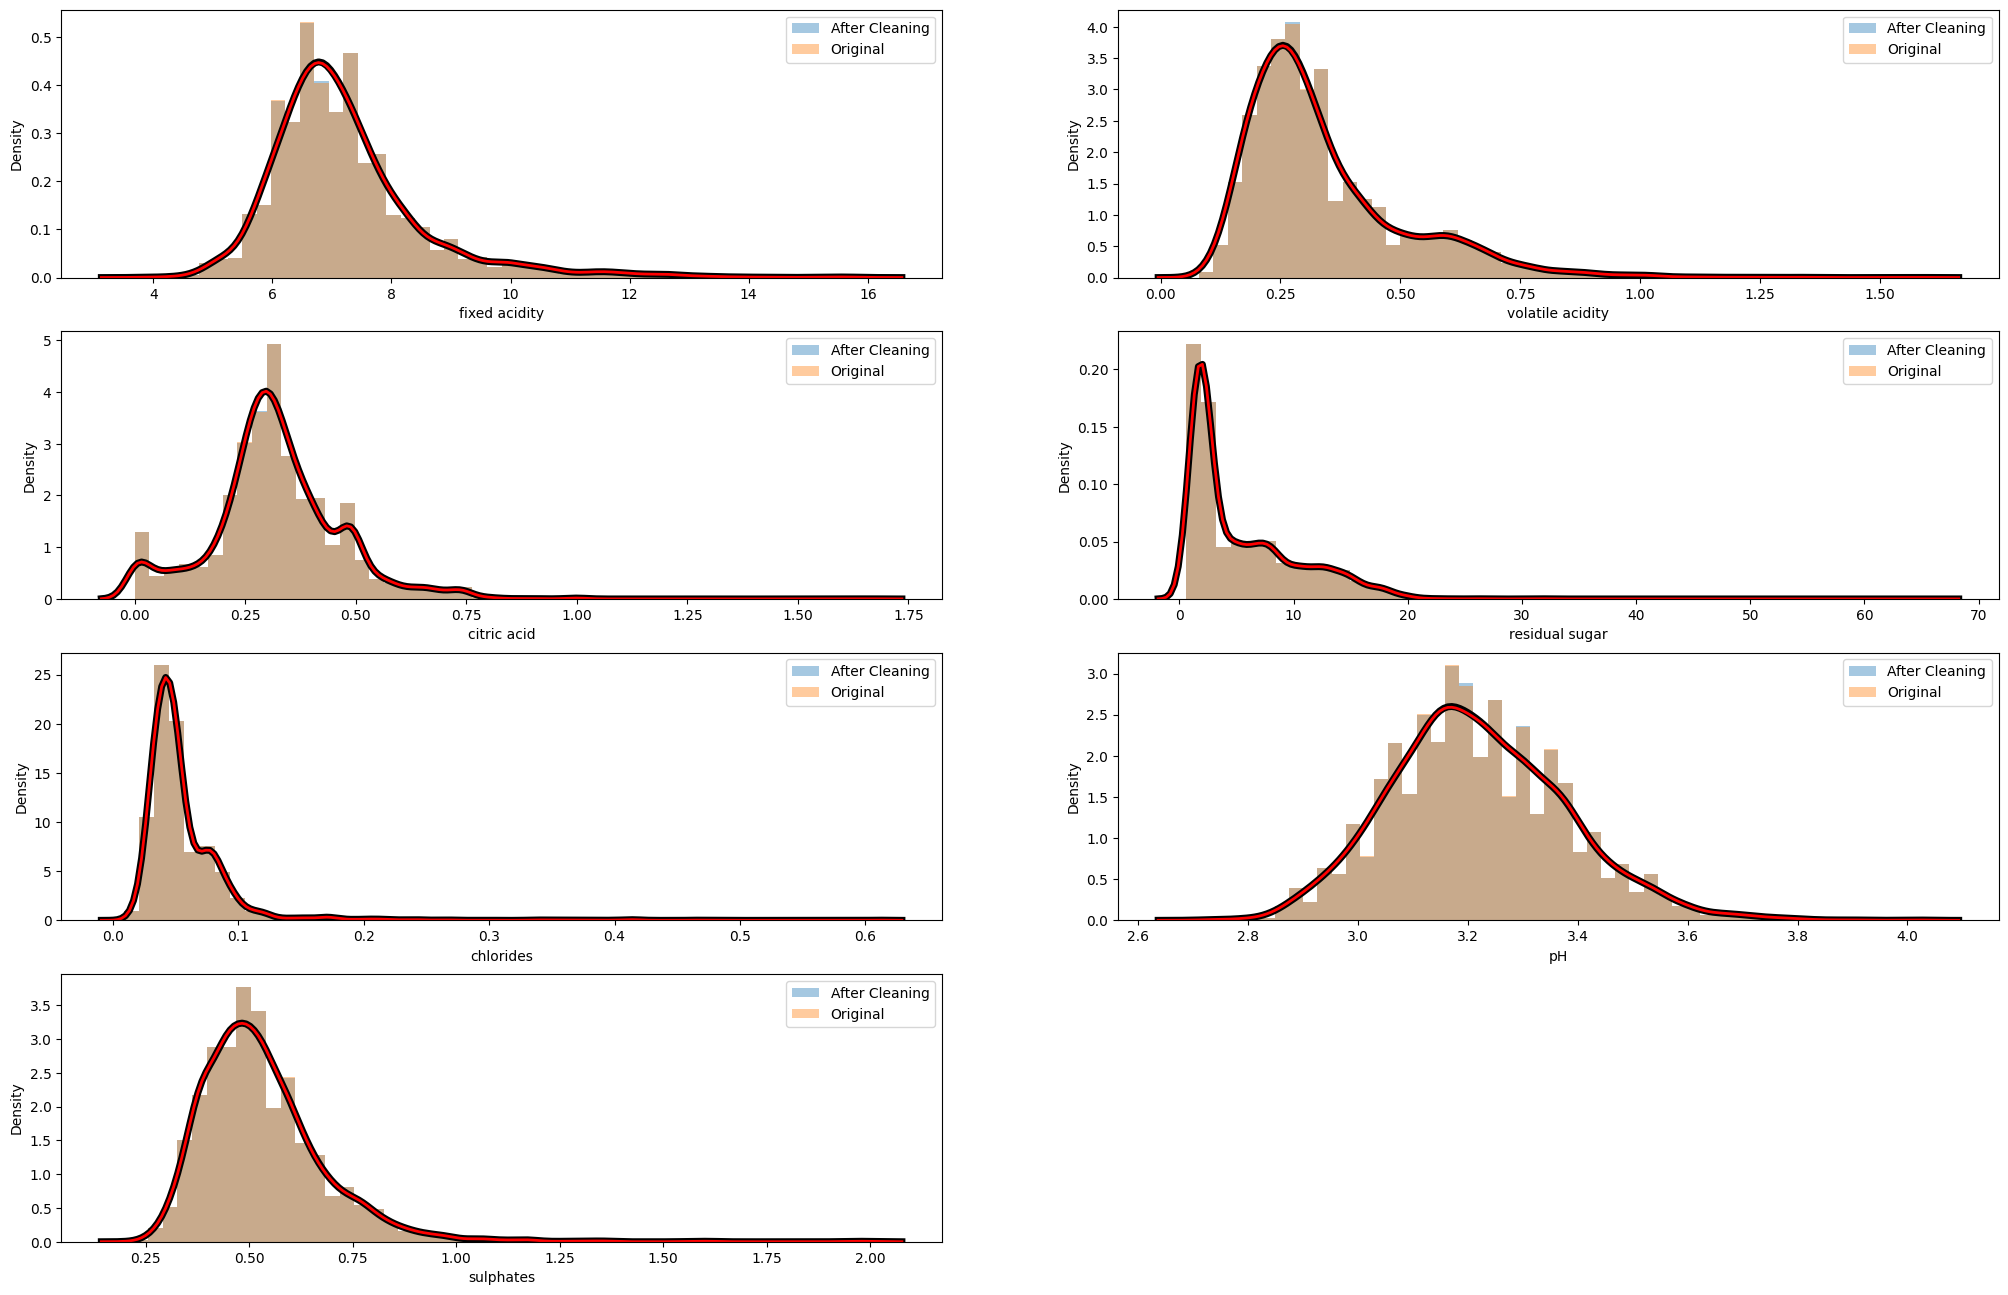

In [79]:
plt.figure(figsize=(25,16))
for i,col in enumerate(null_columns):
    plt.subplot(4,2,i+1)
    sns.distplot(df[col],kde_kws={"linewidth":5,"color":"k"},label="After Cleaning")
    sns.distplot(wine_df[col],kde_kws={"linewidth":2,"color":"r"},label="Original")
    plt.legend()

In [80]:
num_cols=df.iloc[:,1:-1].columns
num_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

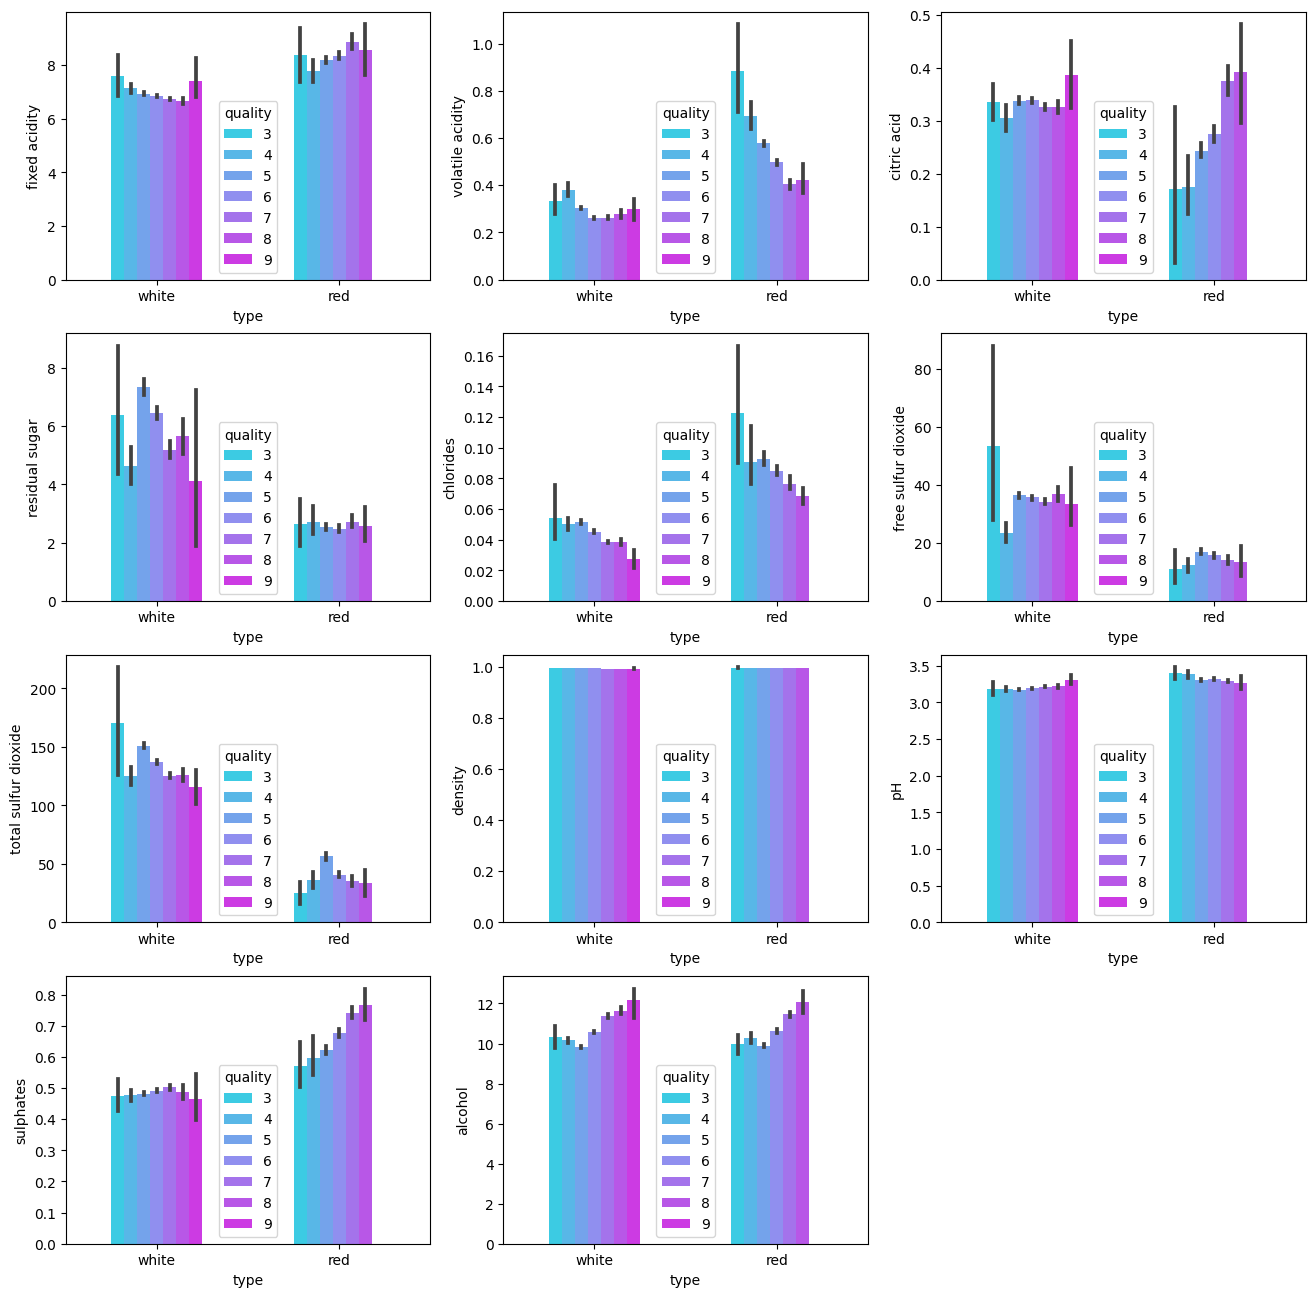

In [81]:
plt.figure(figsize=(16,16))
for i,col in enumerate(num_cols):
    plt.subplot(4,3,i+1)
    sns.barplot(x=df.type,y=df[col],palette="cool",width=0.5,hue=df.quality)


In [82]:
df["type"]=df["type"].replace(["white","red"],[1,0])

In [83]:
df["type"].unique()

array([1, 0], dtype=int64)

In [84]:
df.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [85]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [86]:
correlation=df.corr()

<Axes: >

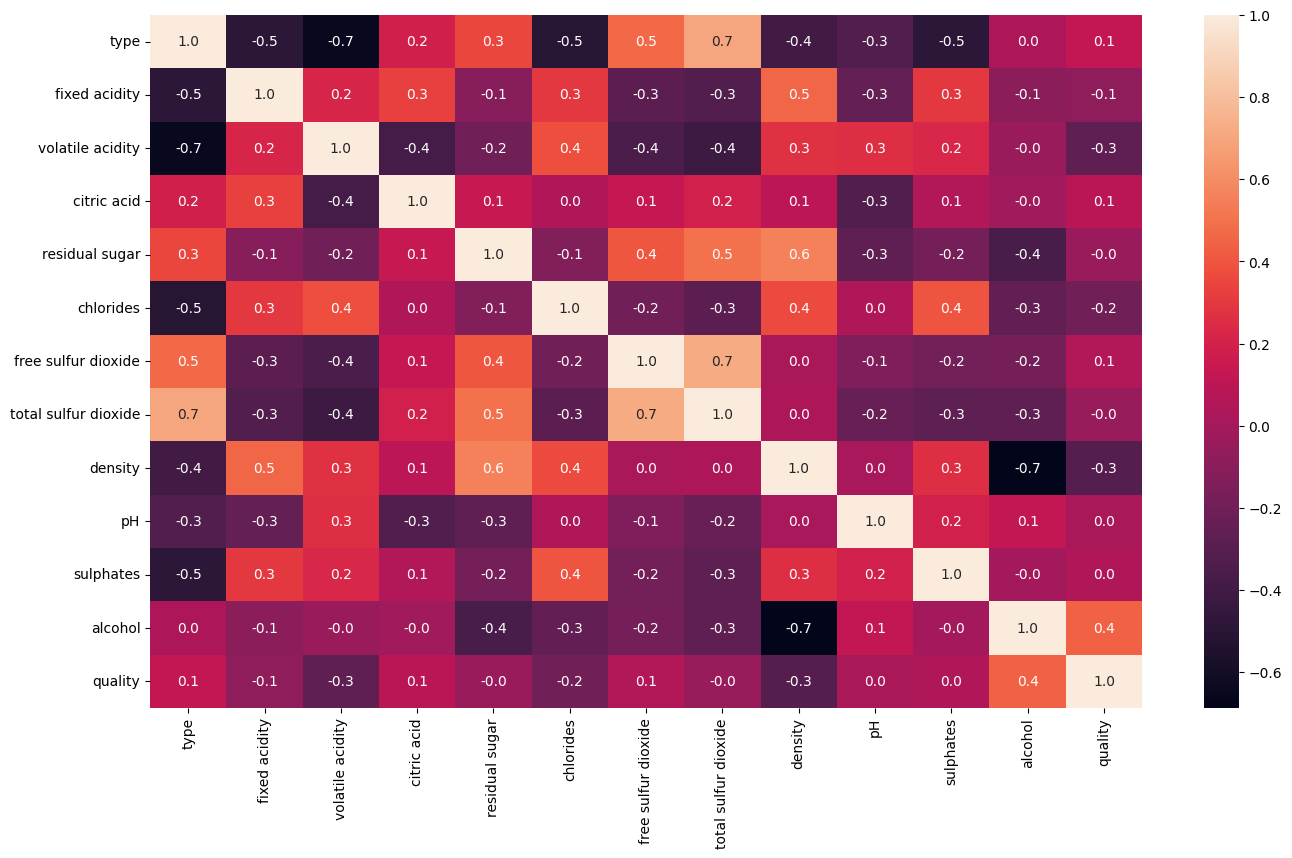

In [90]:
plt.figure(figsize=(16,9))
sns.heatmap(correlation,fmt='.1f',cbar=True,annot=True)

In [92]:
sorted(df["quality"].unique())

[3, 4, 5, 6, 7, 8, 9]

In [93]:
df["quality"]=df["quality"].apply(lambda x:1 if x>6 else 0)

In [95]:
df["quality"].unique()

array([0, 1], dtype=int64)

In [96]:
x=df.iloc[:,:-1].values
x

array([[ 1.   ,  7.   ,  0.27 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 1.   ,  6.3  ,  0.3  , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 1.   ,  8.1  ,  0.28 , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 0.   ,  6.3  ,  0.51 , ...,  3.42 ,  0.75 , 11.   ],
       [ 0.   ,  5.9  ,  0.645, ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.   ,  6.   ,  0.31 , ...,  3.39 ,  0.66 , 11.   ]])

In [97]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
model_ss=StandardScaler()
x=model_ss.fit_transform(x)
x

array([[ 0.57136659, -0.16705143, -0.42326287, ..., -1.35954398,
        -0.54606838, -1.41855821],
       [ 0.57136659, -0.70723376, -0.2409628 , ...,  0.50803473,
        -0.27720648, -0.83161516],
       [ 0.57136659,  0.68180652, -0.36249618, ...,  0.25902424,
        -0.61328385, -0.32852111],
       ...,
       [-1.75018984, -0.70723376,  1.0351377 , ...,  1.25506622,
         1.47039581,  0.42611996],
       [-1.75018984, -1.01590938,  1.85548803, ...,  2.18885558,
         1.20153392, -0.2446721 ],
       [-1.75018984, -0.93874048, -0.18019611, ...,  1.06830835,
         0.86545655,  0.42611996]])

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (5197, 12)
x_test:  (1300, 12)
y_train:  (5197,)
y_test:  (1300,)


In [117]:
lr=LogisticRegression(warm_start=True,n_jobs=10)
knn=KNeighborsClassifier(n_neighbors=100)
svc=SVC(kernel='sigmoid')
dt=DecisionTreeClassifier(criterion='entropy')
rfc=RandomForestClassifier(criterion='entropy',n_estimators=50,warm_start=True)
gnb=GaussianNB()
xgb=XGBClassifier(use_label_encoder=False,eval_matric="mlogloss")
mlp=MLPClassifier()
ada=AdaBoostClassifier()
qda=QuadraticDiscriminantAnalysis()

In [118]:
models={
    "a":["LogisticRegression",lr],
    "b":["KNeighborsClassifier",knn],
    "c":["SVC",svc],
    "d":["DecisionTreeClassifier",dt],
    "e":["RandomForestClassifier",rfc],
    "f":["GaussianNB",gnb],
    "g":["XGBClassifier",xgb],
    "h":["MLPClassifier",mlp],
    "i":["AdaBoostClassifier",ada],
    "j":["QuadraticDiscriminantAnalysis",qda]
}

In [119]:
def test_model(x_train,x_test,y_train,y_test,model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)*100
    return score

In [120]:
model_score=[]
for model in models:
    print("Trainning Model Name:- ",models[model][0])
    score=test_model(x_train,x_test,y_train,y_test,models[model][1])
    print("Score: ",score)
    print()
    model_score.append([models[model][0],score])

Trainning Model Name:-  LogisticRegression
Score:  80.84615384615384

Trainning Model Name:-  KNeighborsClassifier
Score:  81.92307692307692

Trainning Model Name:-  SVC
Score:  71.46153846153847

Trainning Model Name:-  DecisionTreeClassifier
Score:  84.53846153846155

Trainning Model Name:-  RandomForestClassifier
Score:  88.15384615384615

Trainning Model Name:-  GaussianNB
Score:  73.53846153846155

Trainning Model Name:-  XGBClassifier
Score:  86.84615384615385

Trainning Model Name:-  MLPClassifier
Score:  83.84615384615385

Trainning Model Name:-  AdaBoostClassifier
Score:  81.84615384615384

Trainning Model Name:-  QuadraticDiscriminantAnalysis
Score:  77.3076923076923



In [130]:
model_rfc=RandomForestClassifier(n_estimators=150,criterion='log_loss',random_state=50)
model_rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=150, random_state=50)

In [131]:
ypred=model_rfc.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
accuracy_score(ypred,y_test)

0.8815384615384615